Summary Statistics:

         Unnamed: 0    categoryId  thumbnails.default.width  \
count  27949.000000  27949.000000                   27949.0   
mean   13974.000000     20.353644                     120.0   
std     8068.325673      7.762690                       0.0   
min        0.000000      1.000000                     120.0   
25%     6987.000000     20.000000                     120.0   
50%    13974.000000     22.000000                     120.0   
75%    20961.000000     26.000000                     120.0   
max    27948.000000     44.000000                     120.0   

       thumbnails.default.height  thumbnails.medium.width  \
count                    27949.0                  27949.0   
mean                        90.0                    320.0   
std                          0.0                      0.0   
min                         90.0                    320.0   
25%                         90.0                    320.0   
50%                         90.0             

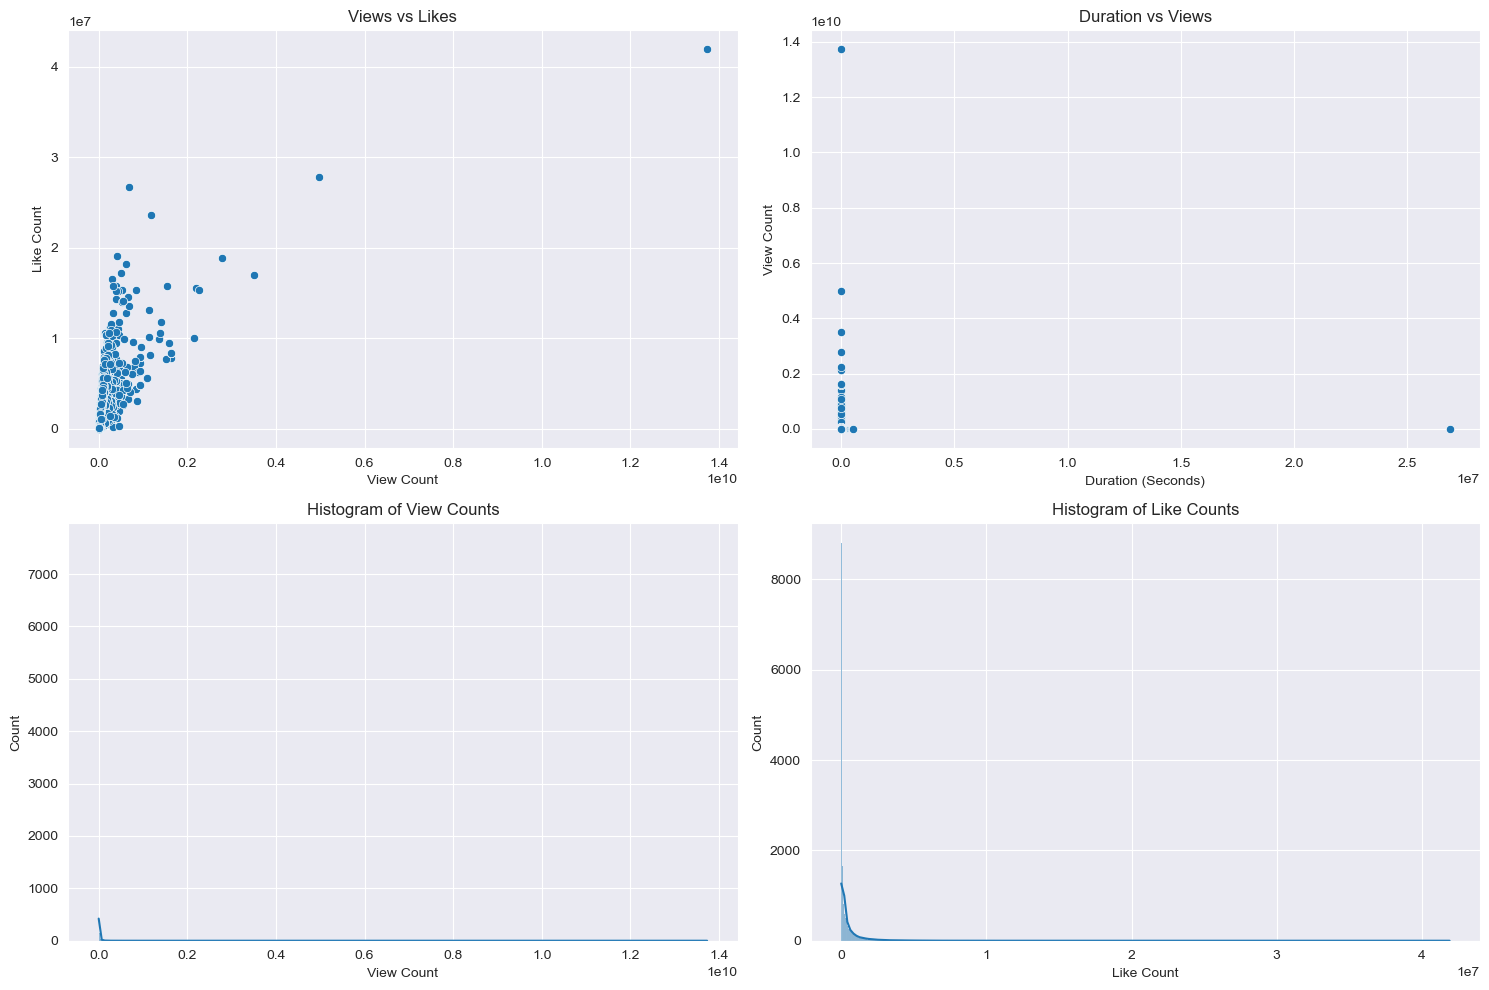

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
# Replace 'cleaned_dataset.csv' with the path to your cleaned dataset file
df = pd.read_csv('hist_cleaned.csv')

# EDA: Summary Statistics
print("Summary Statistics:\n")
print(df.describe())

# Visualizations
plt.figure(figsize=(15, 10))

# Plotting Views vs Likes
plt.subplot(2, 2, 1)
sns.scatterplot(x='viewCount', y='likeCount', data=df)
plt.title('Views vs Likes')
plt.xlabel('View Count')
plt.ylabel('Like Count')

# Plotting Duration vs Views
plt.subplot(2, 2, 2)
sns.scatterplot(x='duration_sec', y='viewCount', data=df)
plt.title('Duration vs Views')
plt.xlabel('Duration (Seconds)')
plt.ylabel('View Count')

# Histogram of View Counts
plt.subplot(2, 2, 3)
sns.histplot(df['viewCount'], kde=True)
plt.title('Histogram of View Counts')
plt.xlabel('View Count')

# Histogram of Like Counts
plt.subplot(2, 2, 4)
sns.histplot(df['likeCount'], kde=True)
plt.title('Histogram of Like Counts')
plt.xlabel('Like Count')

plt.tight_layout()
plt.show()


Top 10 Most Frequent Tags:
 shorts       827
funny        680
science      625
how to       440
education    388
comedy       351
rust         315
Science      314
trap         275
tiktok       270
Name: tags, dtype: int64


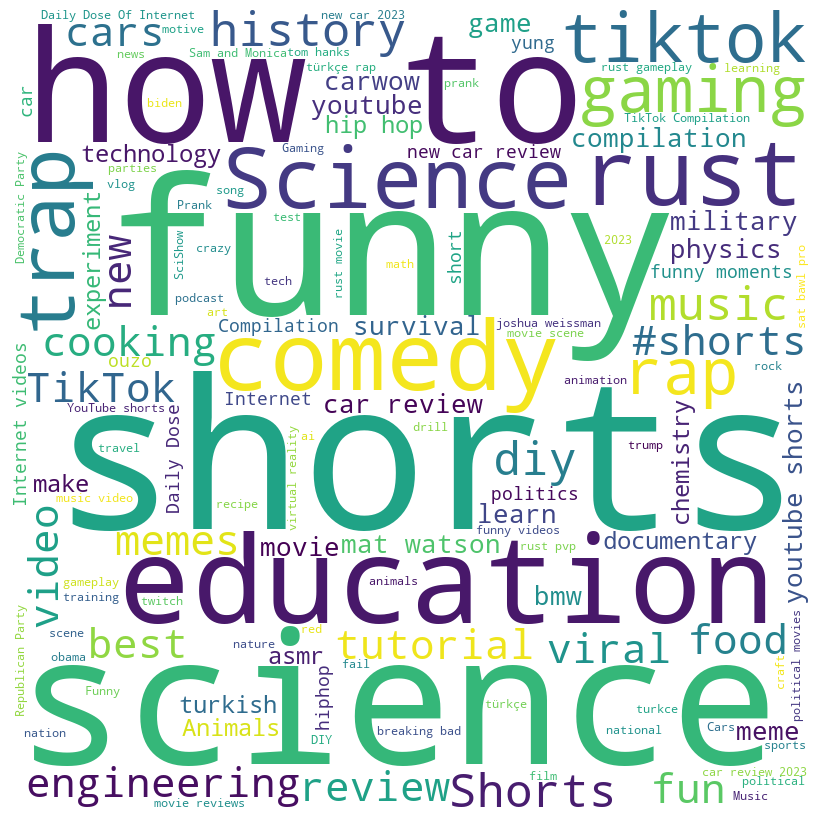

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Load your dataset
# Replace 'cleaned_dataset.csv' with your file path
df = pd.read_csv('hist_cleaned.csv')

# Ensure 'tags' is a list of strings and exclude non-strings or malformed data
def clean_tags(x):
    if isinstance(x, str):
        return x.strip("[]").replace("'", "").split(", ")
    return []

df['tags'] = df['tags'].apply(clean_tags)

# Explode the DataFrame such that each tag gets its own row
tags_df = df.explode('tags')

# Exclude empty or malformed tags
tags_df = tags_df[tags_df['tags'].apply(lambda x: isinstance(x, str) and x != "")]

# Frequency Analysis of Tags
tag_counts = tags_df['tags'].value_counts()

# Display the top 10 most frequent tags
print("Top 10 Most Frequent Tags:\n", tag_counts.head(10))

# Visualization: Word Cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10)
wordcloud.generate_from_frequencies(Counter(tags_df['tags']))

# Plot the Word Cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv('hist_cleaned.csv')

# Check the number of rows in the dataset
num_rows = df.shape[0]
print(f"Number of rows (videos) in the dataset: {num_rows}")

# Assuming tags are stored in a column named 'tags' and are in a string format
# where individual tags are separated by commas
if 'tags' in df.columns:
    # Split the 'tags' column into a list, remove duplicates, and count unique tags
    unique_tags = set(tag for taglist in df['tags'].dropna().apply(lambda x: x.split(", ")) for tag in taglist)
    num_unique_tags = len(unique_tags)
    print(f"Number of unique tags: {num_unique_tags}")
else:
    print("The dataset does not have a 'tags' column.")


Number of rows (videos) in the dataset: 27949
Number of unique tags: 139004


In [13]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv('hist_cleaned.csv')

# Extract and count tags
tag_series = df['tags'].dropna().str.split(', ').explode()
top_tags = tag_series.value_counts().head(500).index

# Initialize a dictionary to hold the new columns
new_columns = {}

# Create a binary matrix for the presence of top tags
for tag in top_tags:
    escaped_tag = re.escape(tag)
    new_columns[f'tag_{tag}'] = df['tags'].str.contains(escaped_tag, regex=True, na=False).astype(int)

# Concatenate the new columns to the original DataFrame
df = pd.concat([df, pd.DataFrame(new_columns)], axis=1)

# Select columns for correlation (including viewCount, likeCount, etc.)
numeric_cols = ['viewCount', 'likeCount', 'commentCount', 'duration_sec']  # Add other relevant numeric columns
tag_cols = list(new_columns.keys())
corr_cols = numeric_cols + tag_cols

# Calculate correlation
correlation_matrix = df[corr_cols].corr()

# You can now visualize this correlation matrix or analyze it further
# For example, you might want to see correlation of tags with viewCount:
view_corr_with_tags = correlation_matrix.loc['viewCount', tag_cols]

print(view_corr_with_tags.sort_values(ascending=False).head(10))  # Top 10 tags correlated with viewCount


tag_'videos'            0.095136
tag_'music video'       0.070487
tag_'official video'    0.053019
tag_'hip hop'           0.036891
tag_'Music'             0.027794
tag_'pop'               0.020542
tag_'freestyle'         0.018896
tag_'the'               0.016920
tag_'rap'               0.015675
tag_'music'             0.015162
Name: viewCount, dtype: float64


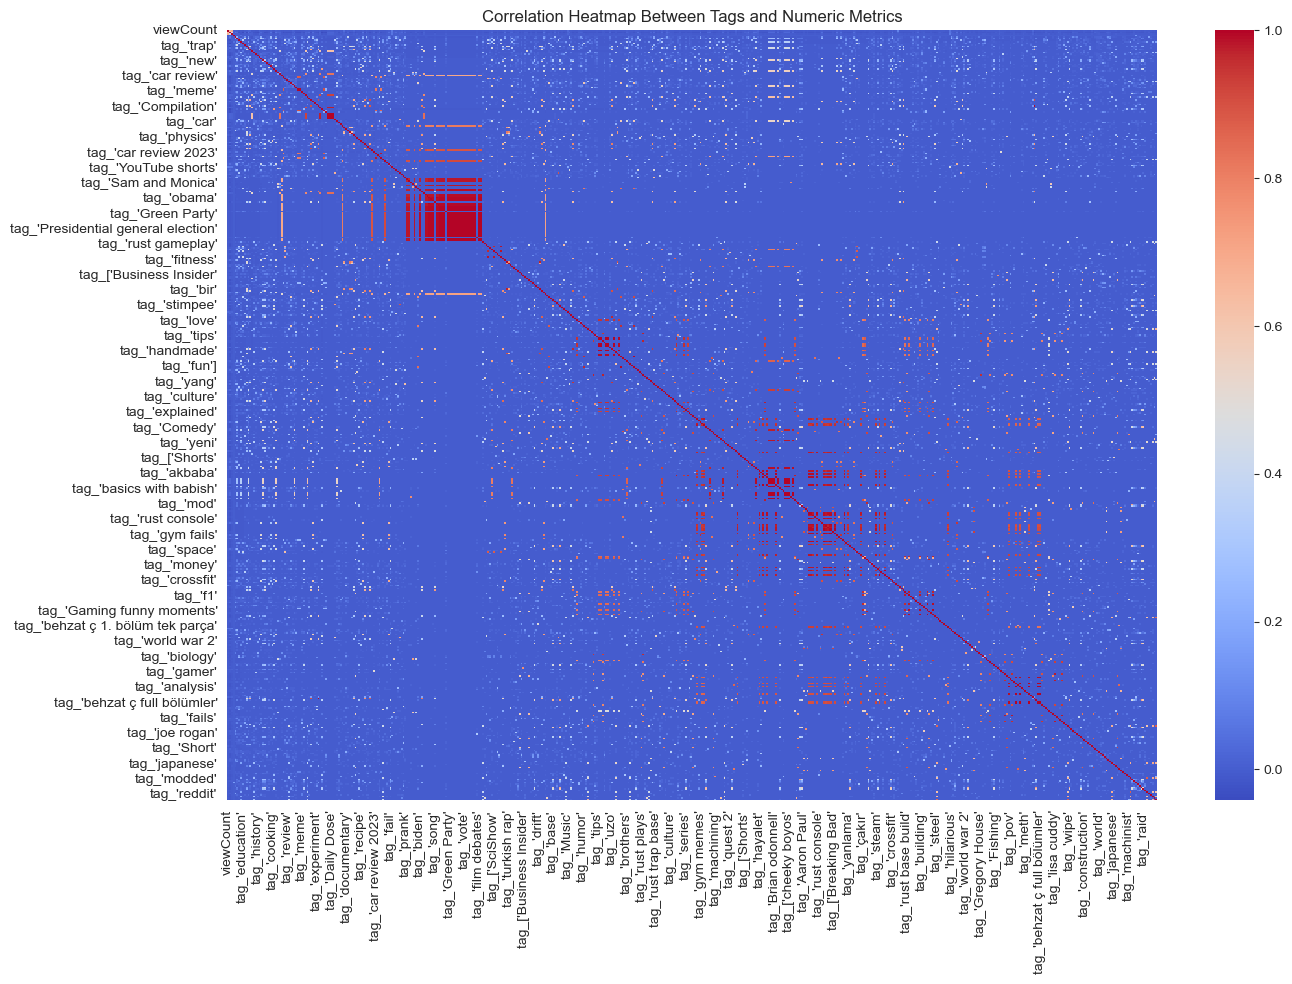

Top Correlated Tags with View Count:
 tag_'videos'            0.095136
tag_'music video'       0.070487
tag_'official video'    0.053019
tag_'hip hop'           0.036891
tag_'Music'             0.027794
tag_'pop'               0.020542
tag_'freestyle'         0.018896
tag_'the'               0.016920
tag_'rap'               0.015675
tag_'music'             0.015162
Name: viewCount, dtype: float64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of Tag Correlations with Numeric Metrics
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap Between Tags and Numeric Metrics')
plt.show()

# Analysis of Top Correlations
# For example, focusing on viewCount
top_correlated_tags_with_views = view_corr_with_tags.sort_values(ascending=False).head(10)
print("Top Correlated Tags with View Count:\n", top_correlated_tags_with_views)


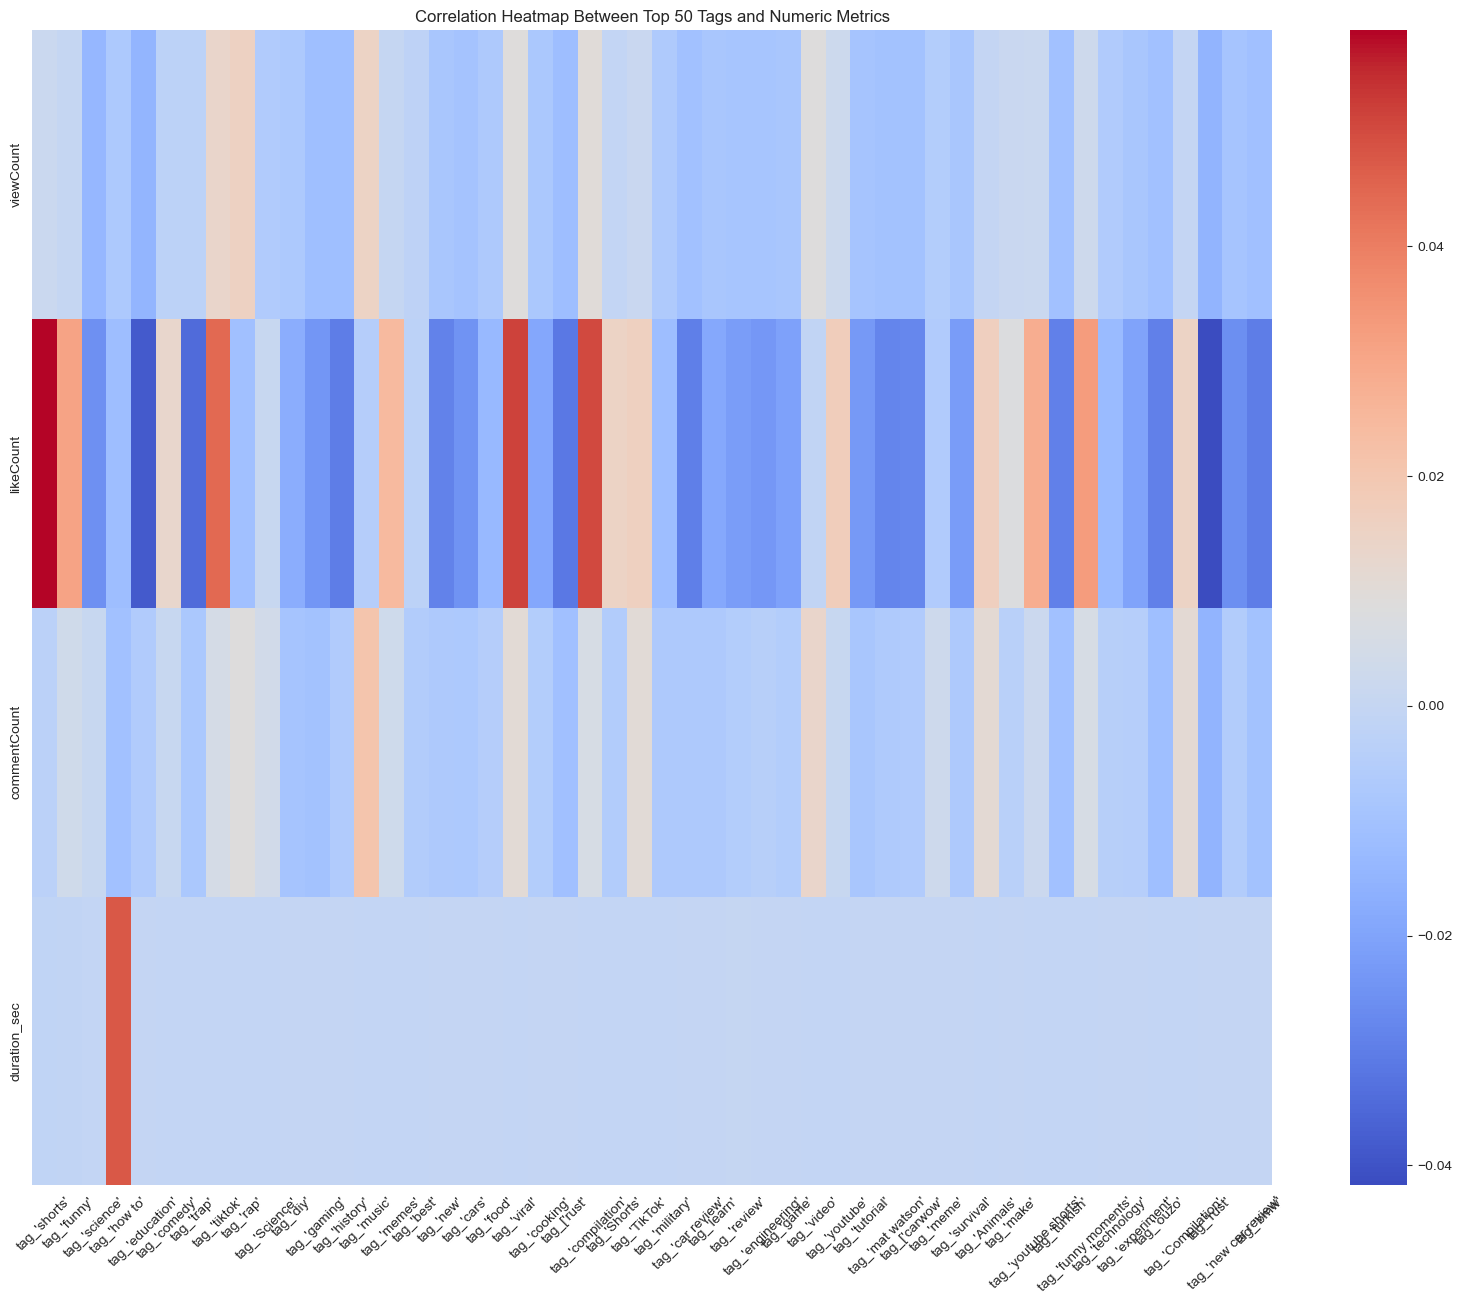

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 50 tags based on their overall presence
top_50_tags = tag_series.value_counts().head(50).index
top_50_tag_cols = [f'tag_{tag}' for tag in top_50_tags]

# Extracting correlations for top 50 tags
tag_corr_with_numeric_top_50 = correlation_matrix.loc[numeric_cols, top_50_tag_cols]

# Create a heatmap with the top 50 tags
plt.figure(figsize=(20, 15))  # Increase figure size for better legibility
sns.heatmap(tag_corr_with_numeric_top_50, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap Between Top 50 Tags and Numeric Metrics')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()


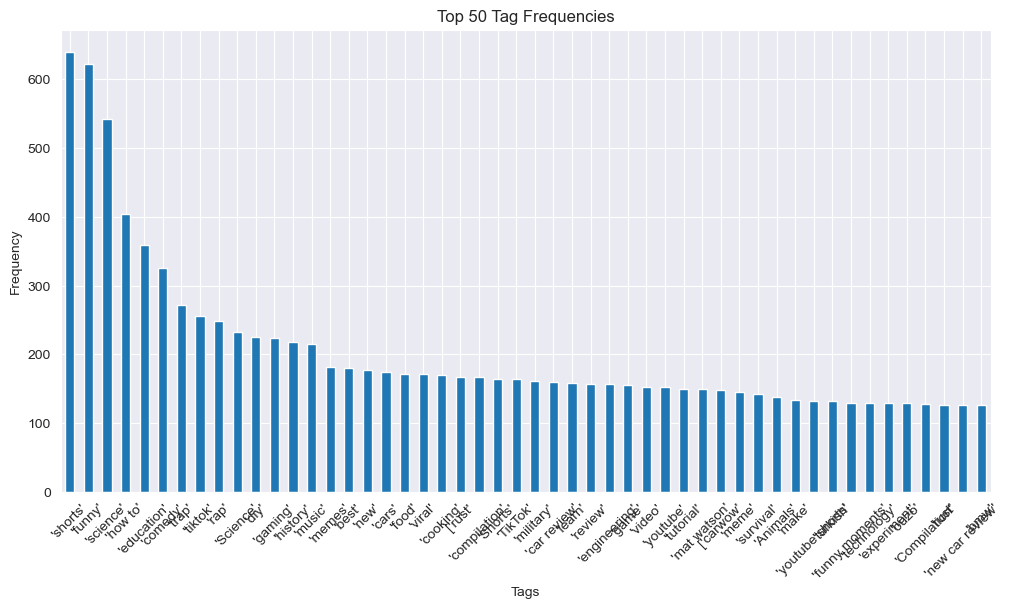

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('hist_cleaned.csv')

# Calculate tag frequencies and select top 50 tags
tag_series = df['tags'].dropna().str.split(', ').explode()
top_50_tags = tag_series.value_counts().head(50)

# Create Histogram
plt.figure(figsize=(12, 6))
top_50_tags.plot(kind='bar')
plt.title('Top 50 Tag Frequencies')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


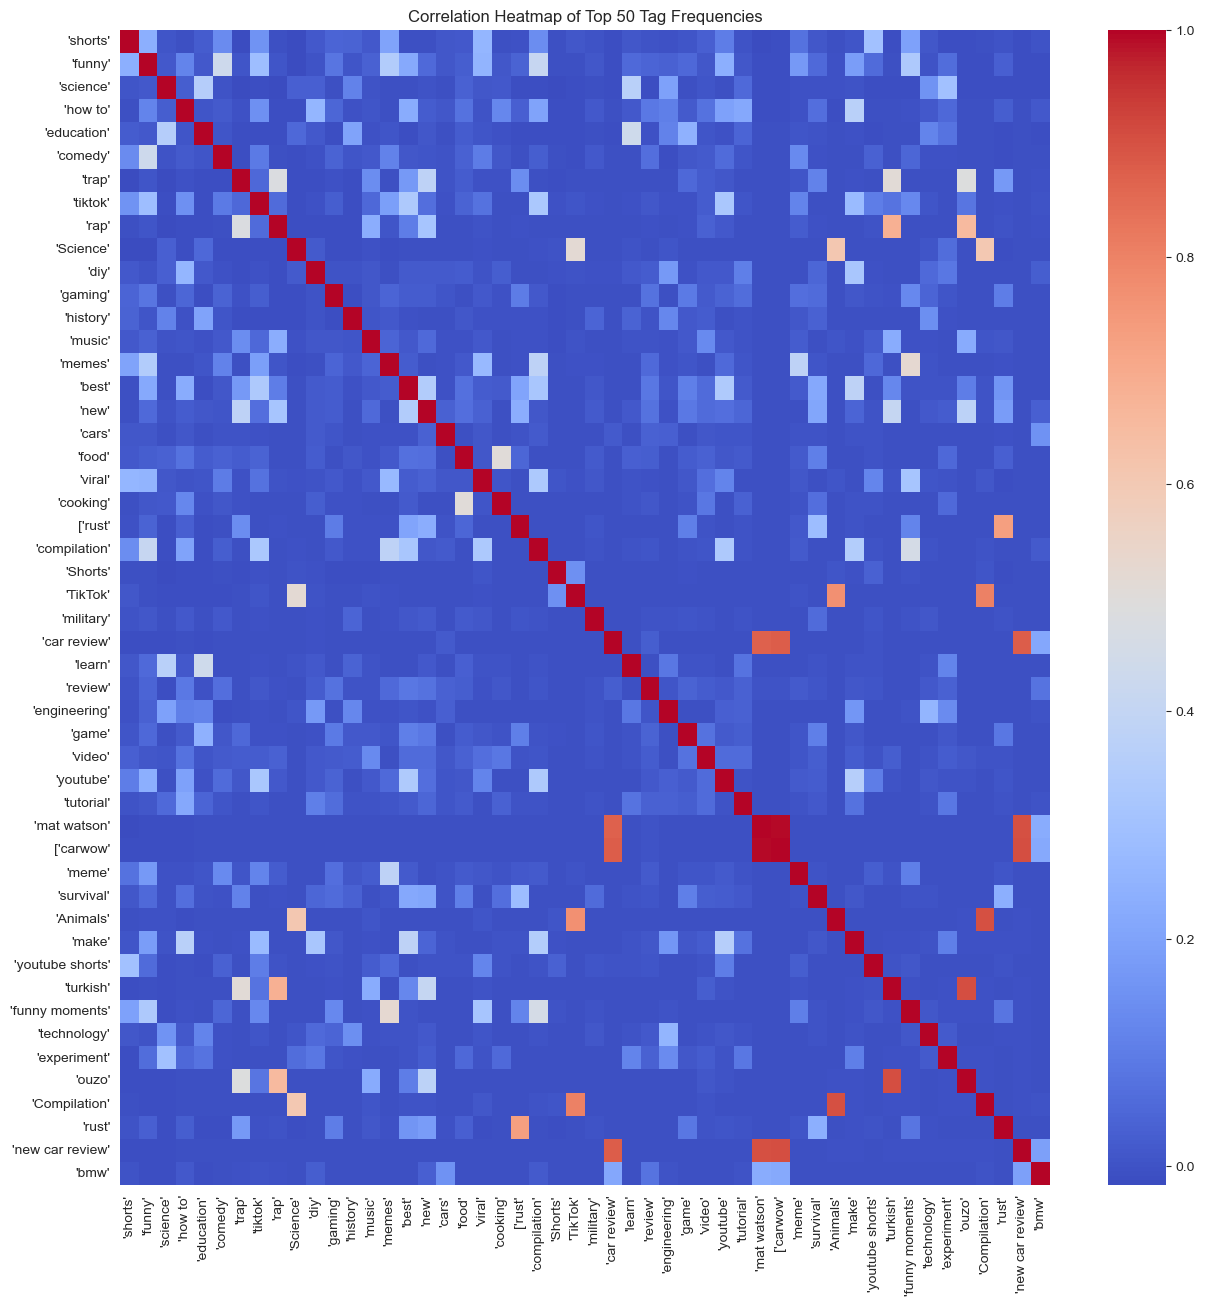

In [19]:
# Create a binary matrix for the presence of top 50 tags
binary_matrix = pd.DataFrame()
for tag in top_50_tags.index:
    binary_matrix[tag] = df['tags'].str.contains(tag, regex=False, na=False).astype(int)

# Calculate correlation matrix
tag_correlation_matrix = binary_matrix.corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(tag_correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Top 50 Tag Frequencies')
plt.show()


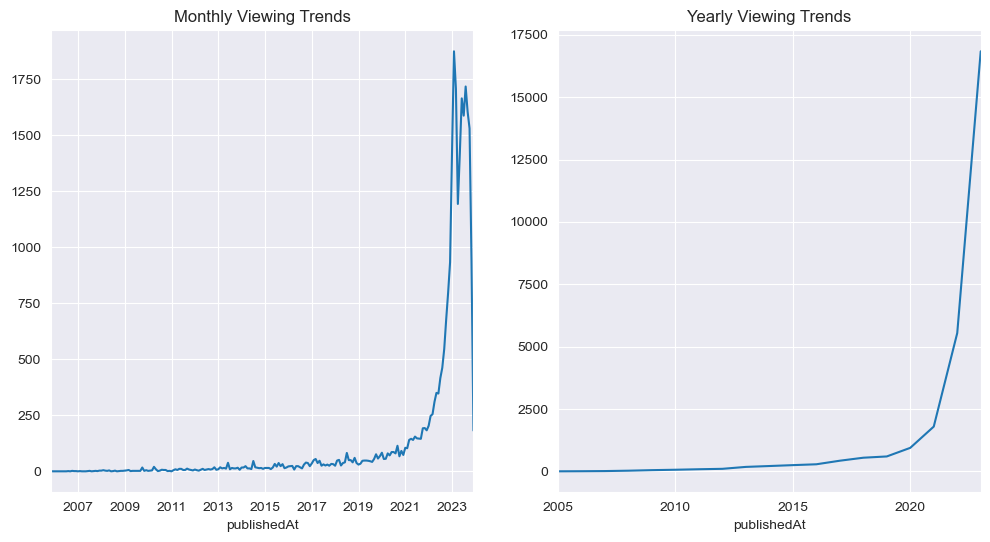

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('hist_cleaned.csv')

# Convert 'publishedAt' to datetime for trend analysis
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Monthly and yearly trends
monthly_trends = df.resample('M', on='publishedAt').size()
yearly_trends = df.resample('Y', on='publishedAt').size()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
monthly_trends.plot(title='Monthly Viewing Trends')
plt.subplot(1, 2, 2)
yearly_trends.plot(title='Yearly Viewing Trends')
plt.show()


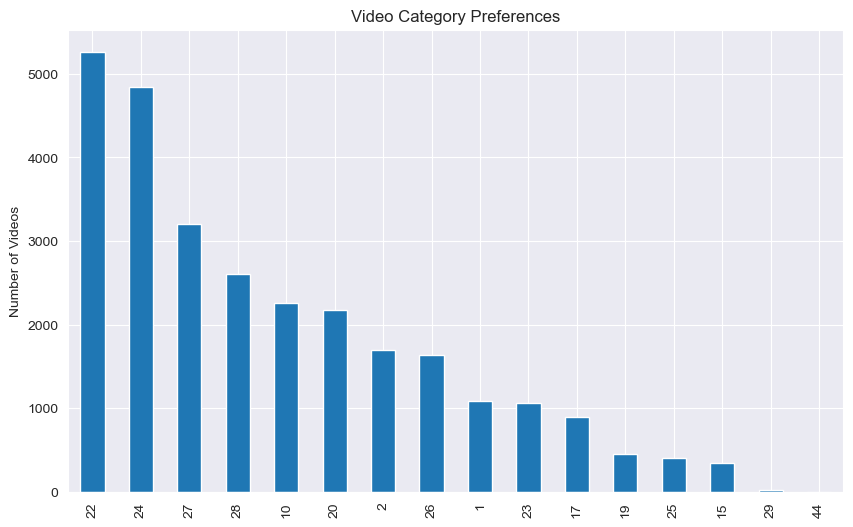

In [22]:
# Assuming 'categoryId' maps to specific video categories
category_counts = df['categoryId'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', title='Video Category Preferences')
plt.ylabel('Number of Videos')
plt.show()


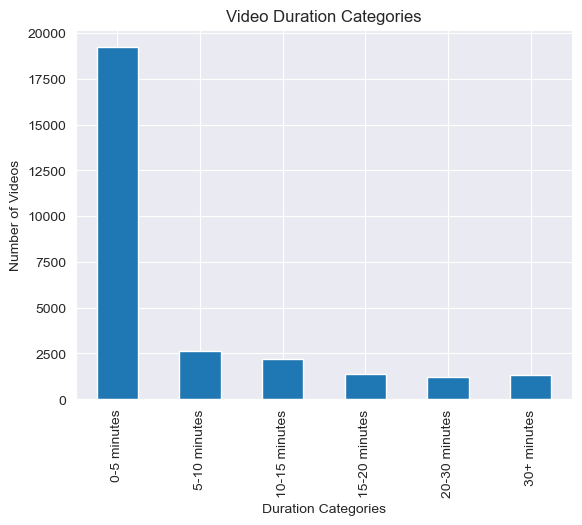

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('hist_cleaned.csv')

# Define the bins for the duration
bins = [0, 5*60, 10*60, 15*60, 20*60, 30*60, float('inf')]
labels = ['0-5 minutes', '5-10 minutes', '10-15 minutes', '15-20 minutes', '20-30 minutes', '30+ minutes']

# Categorize the videos based on duration
df['duration_category'] = pd.cut(df['duration_sec'], bins=bins, labels=labels, right=False)

# Count the number of videos in each category
duration_category_counts = df['duration_category'].value_counts(sort=False)

# Plotting the distribution of video duration categories
duration_category_counts.plot(kind='bar', title='Video Duration Categories')
plt.xlabel('Duration Categories')
plt.ylabel('Number of Videos')
plt.show()


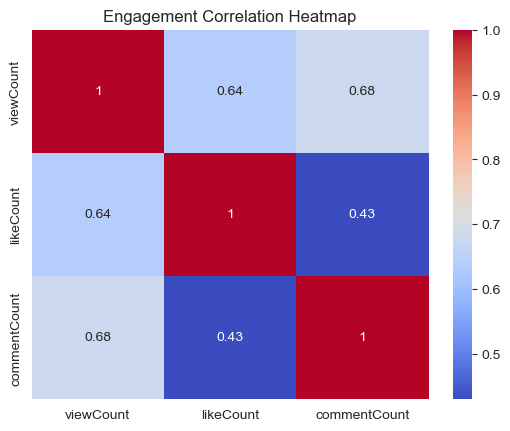

In [24]:
# Correlation between views, likes, and comments
engagement_cols = ['viewCount', 'likeCount', 'commentCount']
engagement_corr = df[engagement_cols].corr()

sns.heatmap(engagement_corr, annot=True, cmap='coolwarm')
plt.title('Engagement Correlation Heatmap')
plt.show()


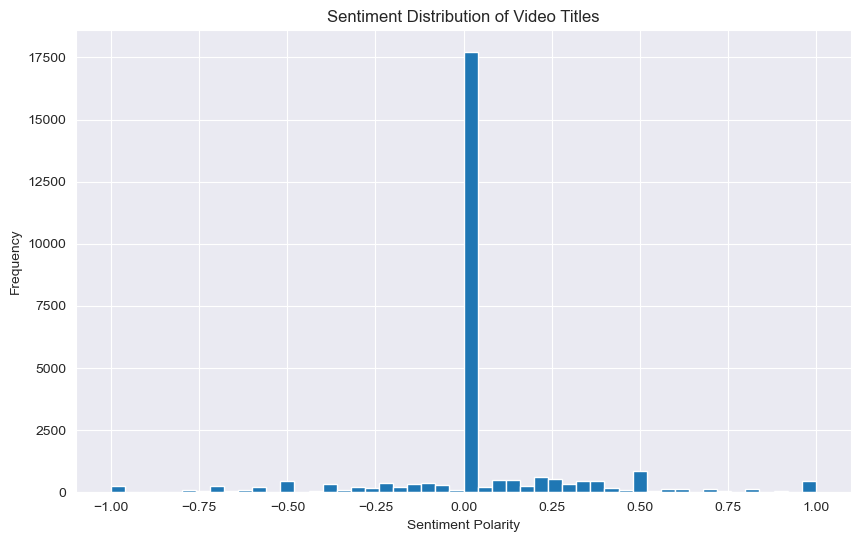

In [4]:
from textblob import TextBlob

# Perform sentiment analysis on video titles
df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the distribution of title sentiment
plt.figure(figsize=(10, 6))
df['title_sentiment'].plot(kind='hist', bins=50, title='Sentiment Distribution of Video Titles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [27]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('hist_cleaned.csv')

# Select the top 10 videos by view count
top_videos = df.nlargest(50, 'viewCount')

# Create the base scatter plot
fig = go.Figure(data=[go.Scatter(
    x=top_videos['viewCount'],
    y=top_videos['likeCount'],
    mode='markers',
    marker=dict(color='LightSkyBlue'),
    text=top_videos['title'],  # hover text goes here
    hoverinfo='text+x+y')])

# Add image traces for each thumbnail
for index, row in top_videos.iterrows():
    # Note: The image URL must be secure (https) and CORS enabled
    fig.add_layout_image(
        dict(
            source=row['thumbnails.high.url'],
            xref="x",
            yref="y",
            x=row['viewCount'],
            y=row['likeCount'],
            sizex=200,  # These values will need to be tweaked
            sizey=200,  # These values will need to be tweaked
            xanchor="center",
            yanchor="middle"
        )
    )

# Set the axes to log scale
fig.update_xaxes(type='log')
fig.update_yaxes(type='log')

# Update layout
fig.update_layout(title='Top 50 Videos by View Count',
                  xaxis_title='View Count',
                  yaxis_title='Like Count')

# Show the figure
fig.show()


In [6]:
df.head(5)

,Unnamed: 0,kind,etag,id,publishedAt,channelId,title,description,channelTitle,categoryId,...,regionRestriction.blocked,contentRating.ytRating,regionRestriction.allowed,viewCount,likeCount,favoriteCount,commentCount,duration_sec,duration_category,title_sentiment
0,0,youtube#video,xvZjKi--FR7l0cevCZCwYZJ4mg0,XVv6mJpFOb0,2020-11-18T16:05:43Z,UC8butISFwT-Wl7EV0hUK0BQ,Web Scraping with Python - Beautiful Soup Cras...,Learn how to perform web scraping with Python ...,freeCodeCamp.org,27,...,NaN,NaN,NaN,1368037.0,30363.0,0.0,942.0,4103.0,30+ minutes,0.850000
1,1,youtube#video,W7k3TkwL2TexwZtz3HYNPsiYYF4,zlzzO1e6dws,2018-08-22T17:30:00Z,UCRHZGz8g6b10rcvhcaq1M5A,How to Download Your YouTube History! Download...,Hey guys my name is Scoby and in todays video ...,Scoby Tech,27,...,NaN,NaN,NaN,37912.0,433.0,0.0,47.0,129.0,0-5 minutes,0.000000
2,2,youtube#video,ZF9ByX3rH8mu61jbYViFD4Y0xlo,N-4prIh7t38,2021-09-11T23:19:54Z,UChQtiqWWOhPB0SSi7Xmxx7Q,JSON API: Explained in 4 minutes (+ EXAMPLES),In this video I give a basic overview of the J...,TheAdimar,27,...,NaN,NaN,NaN,21579.0,460.0,0.0,12.0,251.0,0-5 minutes,0.000000
3,3,youtube#video,awGRQQRtWYUO0i0f2fYHbw8MLQQ,d5PBq6k4uzM,2023-09-09T14:26:42Z,UCrUL8K81R4VBzm-KOYwrcxQ,JSON in 5 minutes or less,Come and let me bestow upon you the glory that...,Engineer Man,28,...,NaN,NaN,NaN,13148.0,727.0,0.0,39.0,312.0,5-10 minutes,-0.166667
4,4,youtube#video,WGGKuXepelwEEjupFYUTmp3nCoI,5qtC-tsQ-wE,2020-02-23T11:59:11Z,UCbXgNpp0jedKWcQiULLbDTA,YouTube Data API Tutorial with Python - Analyz...,In this Python Tutorial we will be learning ho...,Patrick Loeber,27,...,NaN,NaN,NaN,37597.0,733.0,0.0,85.0,1242.0,20-30 minutes,0.000000
